# Tools for Data Science 
# Exercises for Neural Networks II


### Installing TensorFlow

Instructions for installing TensorFlow are available at [the tensorflow install page](https://www.tensorflow.org/versions/r1.0/install/).

It is recommended that you use the command: 
```
pip install tensorflow
```


**Exercise 1:** Use TensorFlow to compute the derivative of $f(x) = e^x$ at $x=2$.

In [ ]:
!pip install tensorflow
!pip install --upgrade pip


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1


In [ ]:
import tensorflow as tf
import numpy as np

# Define the input as a TensorFlow variable
x = tf.Variable(2.0)

with tf.GradientTape() as tape:
    # Watch the variable
    y = tf.exp(x)  # f(x) = e^x

# Calculate derivative dy/dx
dy_dx = tape.gradient(y, x)

print("The derivative of e^x at x=2 is:", dy_dx.numpy())

The derivative of e^x at x=2 is: 7.389056


**Exercise 2:** Use TensorFlow to find the minimum of the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function) (make sure you look at this link!): 
$$
f(x,y) = (x-1)^2 + 100*(y-x^2)^2.
$$

Do this as an optimization using (a) the stochastic gradient descent optimizer, and (b) Adam. Follow the same process that was used in the "Optimization methods in Keras" section of the lecture, including adjusting the learning rate to see if that makes any difference. Comment on any differences you see in executing the two optimizers.

In [15]:
# your code here for part (a) - SGD
# Define the Rosenbrock function for both tests
def rosenbrock(x, y):
    return (x - 1)**2 + 100 * (y - x**2)**2

# Create TensorFlow variables
x_SGD = tf.Variable(-1.5)
y_SGD = tf.Variable(2.0)

# Set up the SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)

# Training loop
for step in range(10000):
    with tf.GradientTape() as tape:
        loss = rosenbrock(x, y)
    grads = tape.gradient(loss, [x, y])
    optimizer.apply_gradients(zip(grads, [x, y]))

    if step % 1000 == 0:
        print(f"Step {step}: x = {x.numpy():.4f}, y = {y.numpy():.4f}, f(x, y) = {loss.numpy():.6f}")

# Final result
print(f"\nFinal result after {step+1} steps:")
print(f"x = {x.numpy():.4f}, y = {y.numpy():.4f}, f(x, y) = {loss.numpy():.6f}")


Step 0: x = 1.0000, y = 1.0000, f(x, y) = 0.000000
Step 1000: x = 1.0000, y = 1.0000, f(x, y) = 0.000000
Step 2000: x = 1.0000, y = 1.0000, f(x, y) = 0.000000
Step 3000: x = 1.0000, y = 1.0000, f(x, y) = 0.000000
Step 4000: x = 1.0000, y = 1.0000, f(x, y) = 0.000000
Step 5000: x = 1.0000, y = 1.0000, f(x, y) = 0.000000
Step 6000: x = 1.0000, y = 1.0000, f(x, y) = 0.000000
Step 7000: x = 1.0000, y = 1.0000, f(x, y) = 0.000000
Step 8000: x = 1.0000, y = 1.0000, f(x, y) = 0.000000
Step 9000: x = 1.0000, y = 1.0000, f(x, y) = 0.000000

Final result after 10000 steps:
x = 1.0000, y = 1.0000, f(x, y) = 0.000000


In [ ]:
# your code here for part (b) - ADAM

# New varaibles at the same starting point
x_ADAM = tf.Variable(-1.5)
y_ADAM = tf.Variable(2.0)

# Set up the SGD optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop
for step in range(10000):
    with tf.GradientTape() as tape:
        loss = rosenbrock(x_ADAM, y_ADAM)
    grads = tape.gradient(loss, [x_ADAM, y_ADAM])
    optimizer.apply_gradients(zip(grads, [x_ADAM, y_ADAM]))

    if step % 1000 == 0:
        print(f"Step {step}: x = {x_ADAM.numpy():.4f}, y = {y_ADAM.numpy():.4f}, f(x, y) = {loss.numpy():.6f}")

# Final result
print(f"\nFinal result after {step+1} steps:")
print(f"x = {x_ADAM.numpy():.4f}, y = {y_ADAM.numpy():.4f}, f(x, y) = {loss.numpy():.6f}")


Step 0: x = -1.4990, y = 2.0010, f(x, y) = 12.500000
Step 1000: x = -1.3921, y = 1.9441, f(x, y) = 5.726285
Step 2000: x = -1.2854, y = 1.6583, f(x, y) = 5.227292
Step 3000: x = -1.0871, y = 1.1880, f(x, y) = 4.360979
Step 4000: x = -0.7265, y = 0.5335, f(x, y) = 2.985771
Step 5000: x = -0.0576, y = 0.0038, f(x, y) = 1.120240
Step 6000: x = 0.4997, y = 0.2484, f(x, y) = 0.250830
Step 7000: x = 0.7732, y = 0.5971, f(x, y) = 0.051594
Step 8000: x = 0.9163, y = 0.8394, f(x, y) = 0.007025
Step 9000: x = 0.9803, y = 0.9610, f(x, y) = 0.000388

Final result after 10000 steps:
x = 0.9980, y = 0.9960, f(x, y) = 0.000004


YOUR OBSERVATIONS HERE:

SGD with learning rate of 0.001: Final result after 10000 steps: x = 0.9980, y = 0.9960, f(x, y) = 0.000004
SGD with learning rate of 0.005: Final result after 10000 steps: x = 1.0000, y = 1.0000, f(x, y) = 0.000000

Adam with learning rate of 0.001: Final result after 10000 steps: x = 0.9902, y = 0.9805, f(x, y) = 0.000096
Adam with learning rate of 0.005: Final result after 10000 steps: x = 1.0000, y = 1.0000, f(x, y) = 0.000000

From these observations, we see that SGD converged slower at a smaller learning rate, but reached the global minimum efficiently once the learning rate was increased. Adam, on the other hand, adapted too conservatively at a lower learning rate and plateaued before reaching the real min. Increasing Adam’s learning rate allowed it to converge fully as well. This suggests that even though adaptive optimizers are powerful, they also may need tuned.

In [ ]:
# Calculate final point differences (just for comparison)
delta_x = abs(x_ADAM.numpy() - x.numpy())
delta_y = abs(y_ADAM.numpy() - y.numpy())

print(f"Difference in x: {delta_x:.6f}")
print(f"Difference in y: {delta_y:.6f}")

Difference in x: 0.001975
Difference in y: 0.003953


## Using a pre-trained network

There are many examples of pre-trained NN that can be accessed [here](https://www.tensorflow.org/api_docs/python/tf/keras/applications). 
These NN are very large, having been trained on giant computers using massive datasets. 

It can be very useful to initialize a NN using one of these. This is called [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning). 


We'll use a NN that was pretrained for image recognition. This NN was trained on the  [ImageNet](http://www.image-net.org/) project, which contains > 14 million images belonging to > 20,000 classes (synsets). 

In [24]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import vgg16

**Exercise 3:** Use tf.keras.applications.VGG16 (the NN pre-trained on ImageNet) to classify at least two images not done in lecture. These can be images from the lecture folder or your own images. Report on the top five predicted classes and their corresponding probabilities. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


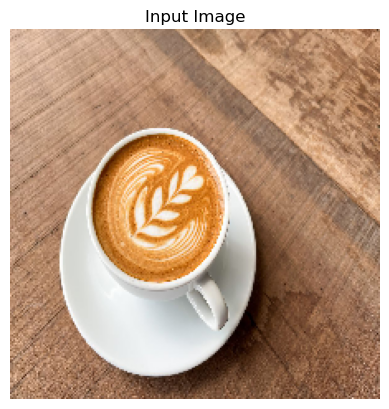

Top 5 predictions for latte.png:
1: espresso (56.79%)
2: cup (6.27%)
3: pill_bottle (5.86%)
4: thimble (2.97%)
5: coffee_mug (2.87%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


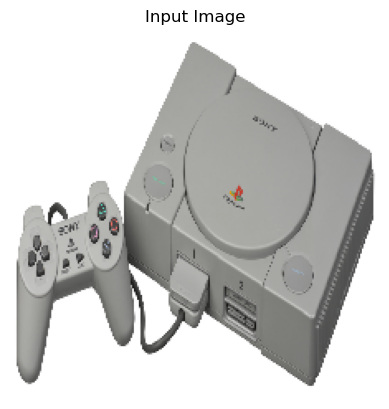

Top 5 predictions for playstation.png:
1: switch (32.71%)
2: CD_player (10.64%)
3: remote_control (10.24%)
4: radio (9.45%)
5: cassette_player (9.27%)




In [ ]:
# your code here
# Load the VGG16 model
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
model = vgg16.VGG16(weights='imagenet')

# Paths to your two images (you can use local files or URLs)
image_paths = [
    '/Users/samstrickler/School/Tools for Data Science/Homework assignments/Module 14 responses/latte.png',
    '/Users/samstrickler/School/Tools for Data Science/Homework assignments/Module 14 responses/playstation.png'
]

# Loop over each image
for img_path in image_paths:
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)

    # Predict
    preds = model.predict(img_preprocessed)
    decoded = decode_predictions(preds, top=5)[0]

    # Show the image
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis("off")
    plt.show()

    # Print top 5 predictions
    print(f"Top 5 predictions for {img_path.split('/')[-1]}:")
    for i, (imagenet_id, label, prob) in enumerate(decoded):
        print(f"{i+1}: {label} ({prob:.2%})")
    print("\n" + "="*50 + "\n")

    image_paths = ['my_images/latte.png', 'my_images/playstation.png']

YOUR OBSERVATIONS HERE

For the latte image, the model correctly predicted that it was espresso with high confidence. The pill bottle prediction was a bit insane though haha. For the PlayStation image, the model gave similar predictions like “switch” and “remote_control.”  These weren't perfect, but I'm not sure that the model of the PlayStation in the image was one of the classes the VGG16 model was trained on. Overall, the model still performed well and showed that it can generalize to new images.